# Cryptocurrency price prediction based on Twitter sentiment analysis

#### Stock price forecasting is piped dream of every stock market trader. There are numerous researchers across the globe trying to devise a way to do this or build a system that would atleast give a maximum accuracy in its prediction of the stock price. One such way is to use a social networking (Twitter) tools data and perform analysis on the general sentiment of people towards that company which would help us in predicting the price movement of that company’s stock. 

#### In our project, we are planning to predict the price movement of various crypto currencies like bitcoin, ethereum, litecoin and ripple. These are some of the most popular currencies in the market with a total market cap of around 500 billion USD. One of the main reasons why we chose to do this project was because currently there is a lot of buzz in the market related to these currencies and trying to use the humongous data that is generated from it to make various predictions seems really interesting. So lets get started.

In [1]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
import requests
import json
from time import sleep
import datetime

from datetime import datetime, date, time 
warnings.filterwarnings('ignore')

C:\Users\keyur_donga\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### To begin this project, we will require a lot of tweets data(every hour) and there is no better way than twitter itself for getting the accurate data. So, we bulit a twitter app which gave us our own credentials that could be used to make custom api calls to its GET/Tweets service. Then, we wrote some code in PHP and javascript that automated our work by calling the API every 5 minutes and fetching the latest data from twitter which would then be stored in my apache server's mysql DB that i have installed locally. The files are available in this project folder for reference. 

#### Now, since twitter's single tweets data seems to have multiple fields that wouldn't be of any use to us for our analysis, we have just removed those fields and only stored the most useful ones to avoid the storage problems. Let me give you an example to make you understand the problem, take a raw twitter feed of just 2000 tweets, it would take a storage space of around 110 MB approx. but choosing only the fields that you really require for your project and only storing those would take far less space like for our project we have a data of around 100,000 tweets which took a storage space of only 34 MB.

In [2]:
with open('tweets-23-04.json') as json_data1:
    jdata1 = json.load(json_data1)
    dfall = pd.DataFrame(jdata1)

#### We have chosen two fields mentioned below based on which the predictions would be made that whether the price of the currencies will increase or decrease.

In [3]:
dfall['Sentiment_score'] = 0.0
dfall['weighted_sentiment_score'] = 0.0
dfall.info()
df = dfall

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95701 entries, 0 to 95700
Data columns (total 10 columns):
created_at                  95701 non-null object
favourite_count             95701 non-null object
language                    95701 non-null object
retweet_count               95701 non-null object
tweet                       95701 non-null object
tweet_id                    95701 non-null object
tweet_time                  95701 non-null object
user_id                     95701 non-null object
Sentiment_score             95701 non-null float64
weighted_sentiment_score    95701 non-null float64
dtypes: float64(2), object(8)
memory usage: 7.3+ MB


In [4]:
#Changing the format of columns to specific datatypes
dfall = df
dfall['retweet_count'] = pd.to_numeric(dfall['retweet_count'])
dfall['favourite_count'] = pd.to_numeric(dfall['favourite_count'])
dfall['tweet_id'] = pd.to_numeric(dfall['tweet_id'])
dfall['user_id'] = pd.to_numeric(dfall['user_id'])
dfall['created_at'] = pd.to_datetime(dfall['created_at'])
dfall['tweet_time'] = pd.to_datetime(dfall['tweet_time'])
dfall = dfall[dfall.retweet_count  >= 20]
dfall['retweet_count'].describe()

count     95701.000000
mean       1175.323570
std        3900.686471
min          20.000000
25%          79.000000
50%         242.000000
75%         649.000000
max      338626.000000
Name: retweet_count, dtype: float64

In [5]:
temp = dfall
temp.tweet_time = temp.tweet_time.dt.date

In [6]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as offline

#### Crunching the data and showing a graph of how many tweets we scraped of each currency from 11/25 to 12/03

In [7]:
month = ['2017-11-25', '2017-11-26', '2017-11-27', '2017-11-28', '2017-11-29', '2017-11-30', '2017-12-01',
         '2017-12-02', '2017-12-03']
dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in month]
Bitcoin = [0, 0, 0, 0, 0, 0, 0, 0, 0]
Litecoin = [0, 0, 0, 0, 0, 0, 0, 0, 0]
Ethereum = [0, 0, 0, 0, 0, 0, 0, 0, 0]
Ripple = [0, 0, 0, 0, 0, 0, 0, 0, 0]

count_m = len(month)
for i in range(0, count_m):
    mask = (temp['tweet_time'] == dates_list[i])
    temp_bit = temp.loc[mask]
    temp_bit.tweet = temp_bit.tweet.str.lower()
    Bitcoin[i] = len(temp_bit[temp_bit['tweet'].str.contains('bitcoin') | temp_bit['tweet'].str.contains('btc')])
    
    Litecoin[i] = len(temp_bit[temp_bit['tweet'].str.contains('litecoin') | temp_bit['tweet'].str.contains('ltc')])
    
    Ethereum[i] = len(temp_bit[temp_bit['tweet'].str.contains('ethereum') | temp_bit['tweet'].str.contains('eth') | temp_bit['tweet'].str.contains('ether')])
    
    Ripple[i] = len(temp_bit[temp_bit['tweet'].str.contains('ripple') | temp_bit['tweet'].str.contains('xrp')])
    

In [13]:
print(Bitcoin)
print(Litecoin)
print(Ethereum)
print(Ripple)

[1928, 83, 2831, 4886, 5032, 7437, 5270, 4541, 4379]
[812, 30, 1041, 985, 1137, 2381, 1422, 1788, 1689]
[1320, 47, 1713, 2639, 3017, 3421, 3126, 3371, 3011]
[328, 17, 894, 1238, 843, 1443, 1151, 1167, 1032]


In [14]:
import plotly
print(plotly.__version__) 
from plotly.graph_objs import Scatter, Layout
#plotly.offline.plot({
init_notebook_mode(connected=True)
offline.iplot({
"data": [
    Scatter(
    x = month,
    y = Bitcoin,
    name = 'Bitcoin',
    line = dict(
        color = ('rgb(226, 146, 23)'),
        width = 4,
        dash = 'dash')
    ),
    Scatter(
    x = month,
    y = Litecoin,
    name = 'Litecoin',
    line = dict(
        color = ('rgb(154, 153, 155)'),
        width = 4,
        dash = 'dash')
    ),
    Scatter(
    x = month,
    y = Ethereum,
    name = 'Ethereum',
    line = dict(
        color = ('rgb(11, 20, 114)'),
        width = 4,
        dash = 'dash')
    ),
    Scatter(
    x = month,
    y = Ripple,
    name = 'Ripple',
    line = dict(
        color = ('rgb(23, 114, 226)'),
        width = 4,
        dash = 'dash')
    )    
],
"layout": Layout(
      title = 'Tweets data per day of given crypto currencies',
      xaxis = dict(title = 'Dates'),
      yaxis = dict(title = 'Tweets(count)')
)
})

2.2.3


In [11]:
dfall.head()

,created_at,favourite_count,language,retweet_count,tweet,tweet_id,tweet_time,user_id,Sentiment_score,weighted_sentiment_score
0,2017-11-28 14:54:22,0,en,608,RT @Cointelegraph: #CT_index provided by The C...,934572394693513216,2017-11-25,2743037434,0.0,0.0
1,2017-11-28 14:56:27,0,en,9181,RT @JonErlichman: Things that did not exist on...,934572392881455104,2017-11-25,14083360,0.0,0.0
2,2017-11-28 14:56:27,0,en,77,RT @mBTCPizpie: Everything up except for Bcash...,934572385738432512,2017-11-25,918524652800049152,0.0,0.0
3,2017-11-28 14:56:27,0,en,74,RT @piratebeachbum: Best bitcoin investing str...,934572377530302464,2017-11-25,933620892541771776,0.0,0.0
4,2017-11-28 14:56:27,0,en,217,RT @silkdynastystx: Amazon has almost no store...,934572360417579009,2017-11-25,1668342847,0.0,0.0


#### We have used the goodle natural language processing API to get the sentiment value of a each tweet( code below ). Use your own API key to get your text analyzed from google NLP.

base = "https://language.googleapis.com"
#count_n = 0
dfLen = len(dfall)-1
print("start")
for i in range(0, dfLen):
    while(count_n < dfLen):
        text1 = dfall.at[count_n,'tweet']

        doc = {"type": "PLAIN_TEXT", "language": "EN", "content": text1 }

        req_data = {"document": doc , "encodingType": "UTF8"}

        analysis_endpoint = "/v1/documents:analyzeSentiment"

        analysis_url = base + analysis_endpoint + "?fields=documentSentiment%2Csentences&keyAI=zaSySWn_O_fmmOYnjp_5MXnW00&alt=json" 

        #response = requests.post(analysis_url, data=json.dumps(req_data))

        analysis_results = json.loads(response.text)

        #print(json.dumps(analysis_results, indent=4))
        
        dfall.ix[count_n, 'Sentiment_score'] = analysis_results["documentSentiment"]["score"]
        
        #sleep(0.2)
        
        count_n += 1
        
        print(count_n)

print("done")

In [16]:
dfall.to_csv('Sentiment--03.csv', sep=',', encoding='utf-8')

#### You will see that at multiple places in our project we are storing the data back to CSV files. Since we are dealing with a large amount of data, it takes a lot of time for all of it to get processed. Hence to avoid wasting time in re-processing the same data or incase if something breaks, we keep storing it. The google NLP api processes around 6000 tweets in an hour so you can imagine how much time it could have taken for us to process 100,000 tweets. So, therefore we kept each days tweets data seperate and the processed it seperately.

In [17]:
crypto = pd.read_csv("Sentiment-03.csv", sep=',')
crypto.drop('Unnamed: 0', axis=1, inplace=True)
crypto.drop('weighted_sentiment_score', axis=1, inplace=True)
crypto['w_sentiment_score'] = 0.0
crypto = crypto[np.isfinite(crypto['retweet_count'])]
crypto['retweet_count'] = crypto['retweet_count'].astype(int)
crypto = crypto.reset_index(drop=True)
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10182 entries, 0 to 10181
Data columns (total 10 columns):
created_at           10182 non-null object
favourite_count      10182 non-null int64
language             10182 non-null object
retweet_count        10182 non-null int32
tweet                10182 non-null object
tweet_id             10182 non-null int64
tweet_time           10182 non-null object
user_id              10182 non-null int64
Sentiment_score      10182 non-null float64
w_sentiment_score    10182 non-null float64
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 755.8+ KB


#### Since each and every tweet shouldnt have the same weights, we decided to assign them weights based on the tweet owners popularity by taking into account the retweet count of that tweet, i.e. the more the retweet count the higher the weight assigned. It is only logical to take this step because it doesnt make sense to take into consideration a tweet whose retweet is just 20 and the other with 2000 retweets and give them both equal weights because the latter one has reached a larger audience and has thus affected the sentiment of a large number of people. Hence, the code that is written below assigns each tweets a certain weight and then generates a new weighted sentiment score.

In [18]:
count_n = 0
dfLen = len(crypto)
print("start")
for i in range(0, dfLen):
    while(count_n < dfLen):
        #print(count_n)
        if(crypto.ix[count_n, 'retweet_count'] >= 3000):
            if(crypto.ix[count_n, 'Sentiment_score'] > 0):
                crypto.ix[count_n, 'w_sentiment_score'] = (crypto.ix[count_n, 'Sentiment_score'] + 1 )/2
            elif(crypto.ix[count_n, 'Sentiment_score'] < 0):
                crypto.ix[count_n, 'w_sentiment_score'] = (crypto.ix[count_n, 'Sentiment_score'] - 1 )/2
            else:
                crypto.ix[count_n, 'w_sentiment_score'] = 0
        elif(crypto.ix[count_n, 'retweet_count'] < 3000 & crypto.ix[count_n, 'retweet_count'] >= 500):
            if(crypto.ix[count_n, 'Sentiment_score'] > 0):
                crypto.ix[count_n, 'w_sentiment_score'] = (crypto.ix[count_n, 'Sentiment_score'] + 0.75 )/2
            elif(crypto.ix[count_n, 'Sentiment_score'] < 0):
                crypto.ix[count_n, 'w_sentiment_score'] = (crypto.ix[count_n, 'Sentiment_score'] - 0.75 )/2
            else:
                crypto.ix[count_n, 'w_sentiment_score'] = 0
        elif(crypto.ix[count_n, 'retweet_count'] < 500 & crypto.ix[count_n, 'retweet_count'] >= 200):
            if(crypto.ix[count_n, 'Sentiment_score'] > 0):
                crypto.ix[count_n, 'w_sentiment_score'] = (crypto.ix[count_n, 'Sentiment_score'] + 0.5 )/2
            elif(crypto.ix[count_n, 'Sentiment_score'] < 0):
                crypto.ix[count_n, 'w_sentiment_score'] = (crypto.ix[count_n, 'Sentiment_score'] - 0.5 )/2
            else:
                crypto.ix[count_n, 'w_sentiment_score'] = 0
        else:
            if(crypto.ix[count_n, 'Sentiment_score'] > 0):
                crypto.ix[count_n, 'w_sentiment_score'] = (crypto.ix[count_n, 'Sentiment_score'] + 0.25 )/2
            elif(crypto.ix[count_n, 'Sentiment_score'] < 0):
                crypto.ix[count_n, 'w_sentiment_score'] = (crypto.ix[count_n, 'Sentiment_score'] - 0.25 )/2
            else:
                crypto.ix[count_n, 'w_sentiment_score'] = 0
        count_n +=1

start


In [19]:
print(crypto)
crypto.to_csv('WSentiment--03.csv', sep=',', encoding='utf-8')

                created_at  favourite_count language  retweet_count  \
0      2017-12-04 15:47:32                0       en            609   
1      2017-12-04 15:47:32                0       en            145   
2      2017-12-04 15:47:32                0       en             85   
3      2017-12-04 15:47:31                0       en           1703   
4      2017-12-04 15:47:31                0       en            556   
5      2017-12-04 15:47:31                0       en             91   
6      2017-12-04 15:47:31                0       en            886   
7      2017-12-04 15:47:31                0       en           8774   
8      2017-12-04 15:47:31                0       en             87   
9      2017-12-04 15:46:53                0       en             21   
10     2017-12-04 15:46:53                0       en            332   
11     2017-12-04 15:46:53                0       en            247   
12     2017-12-04 15:47:35                0       en           1419   
13    

In [20]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn
%matplotlib inline

#### Below, we have imported a price movement data ( by the hour ) of each day and then checked for the fluctuations i.e. whether the closing price is higher(1) or lower(-1) than opening price.

In [21]:
ethPrice = pd.read_csv("btc.csv", sep=',',parse_dates=['date'])
ethPrice.dtypes

Unnamed: 0              int64
date           datetime64[ns]
open                  float64
close                 float64
fluctuation             int64
dtype: object

In [22]:
ethPrice = ethPrice.sort_values(by='date')
ethPrice.set_index('date',inplace=True)

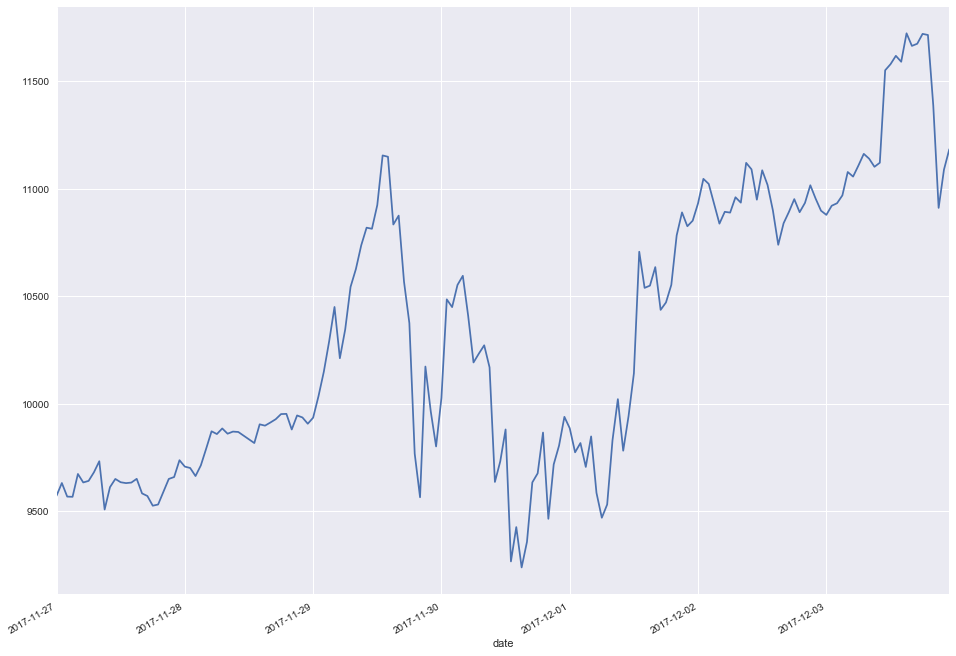

In [23]:
ethPrice['close'].plot(figsize=(16, 12))

In [24]:
eth = pd.read_csv("Ether-chart.csv", sep=',')
eth['date'] = ' '
eth.info()
#dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in month]
#eth['close'] = eth['close'].astype('float64') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 5 columns):
time           278 non-null int64
 open          278 non-null float64
close          278 non-null float64
fluctuation    0 non-null float64
date           278 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 10.9+ KB


In [26]:
count_n = 0
ethlen = len(eth)-1
print("start ETH")
for i in range(0, ethlen):
    while(count_n < ethlen):
        temp = eth.ix[count_n, 'time'] 
        if(eth.ix[count_n, ' open'] - eth.ix[count_n, 'close'] > 0):
            eth.ix[count_n, 'fluctuation'] = -1
        elif(eth.ix[count_n, ' open'] - eth.ix[count_n, 'close'] < 0):
            eth.ix[count_n, 'fluctuation'] = 1
        else:
            eth.ix[count_n, 'fluctuation'] = 0
        count_n += 1
        #eth.ix[count_n, 'date'] = str(datetime.datetime.fromtimestamp(
        #                                int(temp)
        #                            ).strftime('%Y-%m-%d %H:%M:%S'))

print("end ETH")

start ETH
end ETH


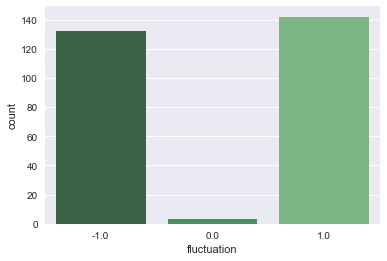

In [27]:
sns.countplot(x="fluctuation", data=eth, palette="Greens_d")

In [28]:
eth.to_csv('ethh.csv', sep=',')

#### After calculating the price movements of all four currencies, we once again store them in the different CSV files. Then we import the weighted sentiment data containing both the sentiments with and without weights.

In [29]:
df1 = pd.read_csv("WSentiment-01.csv", sep=',')
df2 = pd.read_csv("WSentiment-02.csv", sep=',')
df3 = pd.read_csv("WSentiment-03.csv", sep=',')
df26 = pd.read_csv("WSentiment-26.csv", sep=',')
df27 = pd.read_csv("WSentiment-27.csv", sep=',')
df28 = pd.read_csv("WSentiment-28.csv", sep=',')
df29 = pd.read_csv("WSentiment-29.csv", sep=',')
df30 = pd.read_csv("WSentiment-30.csv", sep=',')

In [30]:
frames = [df26, df27, df28, df29, df30, df1, df2, df3]
df = pd.concat(frames)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('user_id', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74050 entries, 0 to 10181
Data columns (total 9 columns):
created_at           74050 non-null object
favourite_count      74050 non-null object
language             74050 non-null object
retweet_count        74050 non-null int64
tweet                74050 non-null object
tweet_id             74036 non-null float64
tweet_time           74036 non-null object
Sentiment_score      74036 non-null float64
w_sentiment_score    74050 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 5.6+ MB


In [31]:
bitcoin = df[df['tweet'].str.contains("bitcoin") | df['tweet'].str.contains("btc") | df['tweet'].str.contains("BTC")]
bitcoin = bitcoin.reset_index(drop=True)
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20523 entries, 0 to 20522
Data columns (total 9 columns):
created_at           20523 non-null object
favourite_count      20523 non-null object
language             20523 non-null object
retweet_count        20523 non-null int64
tweet                20523 non-null object
tweet_id             20523 non-null float64
tweet_time           20523 non-null object
Sentiment_score      20523 non-null float64
w_sentiment_score    20523 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.4+ MB


In [32]:
ether = df[df['tweet'].str.contains("Ethereum") | df['tweet'].str.contains("eth") | df['tweet'].str.contains("ETH")]
ether = ether.reset_index(drop=True)
ether.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19808 entries, 0 to 19807
Data columns (total 9 columns):
created_at           19808 non-null object
favourite_count      19808 non-null object
language             19808 non-null object
retweet_count        19808 non-null int64
tweet                19808 non-null object
tweet_id             19808 non-null float64
tweet_time           19808 non-null object
Sentiment_score      19808 non-null float64
w_sentiment_score    19808 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.4+ MB


In [33]:
lite = df[df['tweet'].str.contains("Litecoin") | df['tweet'].str.contains("ltc") | df['tweet'].str.contains("LTC")]
lite = lite.reset_index(drop=True)
lite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 9 columns):
created_at           9598 non-null object
favourite_count      9598 non-null object
language             9598 non-null object
retweet_count        9598 non-null int64
tweet                9598 non-null object
tweet_id             9598 non-null float64
tweet_time           9598 non-null object
Sentiment_score      9598 non-null float64
w_sentiment_score    9598 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 674.9+ KB


In [34]:
ripple = df[df['tweet'].str.contains("ripple") | df['tweet'].str.contains("Ripple") | df['tweet'].str.contains("XRP")]
ripple = ripple.reset_index(drop=True)
ripple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7536 entries, 0 to 7535
Data columns (total 9 columns):
created_at           7536 non-null object
favourite_count      7536 non-null object
language             7536 non-null object
retweet_count        7536 non-null int64
tweet                7536 non-null object
tweet_id             7536 non-null float64
tweet_time           7536 non-null object
Sentiment_score      7536 non-null float64
w_sentiment_score    7536 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 530.0+ KB


#### We then categorized each tweets that conatined a specifc string to its parent currency, like a tweet containg bitcoin will be stored in bitcoin dataframe.

#### Then we will check the datetime range of every movement from the fluctuation ( usually by the hour ) and calculate an average sentiment of people during that time period of that specific currency, so that we can perform analysis of all four currencies seperately.

In [35]:
bitc = pd.read_csv("btc.csv", sep=',')
bitc.drop('Unnamed: 0', axis=1, inplace=True)
bitc['sentiment'] = 0.0
bitc['w_sentiment'] = 0.0
bitc['date'] = pd.to_datetime(bitc['date'])
ethc = pd.read_csv("eth.csv", sep=',')
ethc.drop('Unnamed: 0', axis=1, inplace=True)
ethc['sentiment'] = 0.0
ethc['w_sentiment'] = 0.0
ethc['date'] = pd.to_datetime(ethc['date'])
ltcc = pd.read_csv("ltc.csv", sep=',')
ltcc.drop('Unnamed: 0', axis=1, inplace=True)
ltcc['sentiment'] = 0.0
ltcc['w_sentiment'] = 0.0
ltcc['date'] = pd.to_datetime(ltcc['date'])
ripc = pd.read_csv("rp.csv", sep=',')
ripc.drop('Unnamed: 0', axis=1, inplace=True)
ripc['sentiment'] = 0.0
ripc['w_sentiment'] = 0.0
ripc['date'] = pd.to_datetime(ripc['date'])
bitc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 6 columns):
date           166 non-null datetime64[ns]
open           166 non-null float64
close          166 non-null float64
fluctuation    166 non-null int64
sentiment      166 non-null float64
w_sentiment    166 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 7.9 KB


In [40]:
print(bitc)

                   date      open     close  fluctuation  sentiment  \
0   2017-11-27 00:00:00   9328.25   9571.85            1        0.0   
1   2017-11-27 01:00:00   9571.85   9631.21            1        0.0   
2   2017-11-27 02:00:00   9631.21   9567.97           -1        0.0   
3   2017-11-27 03:00:00   9567.97   9566.98           -1        0.0   
4   2017-11-27 04:00:00   9566.98   9673.28            1        0.0   
5   2017-11-27 05:00:00   9673.28   9633.78           -1        0.0   
6   2017-11-27 06:00:00   9633.78   9641.04            1        0.0   
7   2017-11-27 07:00:00   9641.04   9681.14            1        0.0   
8   2017-11-27 08:00:00   9681.14   9732.51            1        0.0   
9   2017-11-27 09:00:00   9732.51   9508.01           -1        0.0   
10  2017-11-27 10:00:00   9508.01   9611.86            1        0.0   
11  2017-11-27 11:00:00   9611.86   9650.12            1        0.0   
12  2017-11-27 12:00:00   9650.12   9634.78           -1        0.0   
13  20

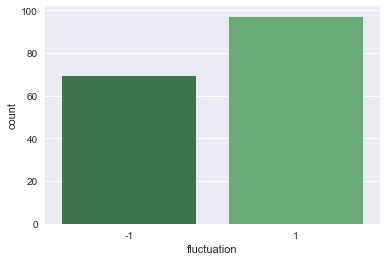

In [37]:
sns.countplot(x="fluctuation", data=bitc, palette="Greens_d")

In [38]:
a = 0
b = 1
while(b<168):
    mask = (ether['tweet_time'] <= str(ethc.ix[b, 'date']) ) & (ether['tweet_time'] >= str(ethc.ix[a, 'date']))
    ether13 = ether.loc[mask]
    count_n = 0
    sentimentPTotal = 0 
    wSentimentPTotal = 0 
    sentimentNTotal = 0 
    wSentimentNTotal = 0 
    dfLen = len(ether13)
    posLen = 0
    negLen = 0
    print("start")
    if(dfLen > 0):
        for i in range(0, dfLen):
            while(count_n < dfLen):
                if(ether.ix[count_n, 'Sentiment_score'] > 0):
                    sentimentPTotal += ether.ix[count_n, 'Sentiment_score']
                    wSentimentPTotal += ether.ix[count_n, 'w_sentiment_score']
                    posLen = posLen + 1
                else:
                    sentimentNTotal += ether.ix[count_n, 'Sentiment_score']
                    wSentimentNTotal += ether.ix[count_n, 'w_sentiment_score']
                    negLen = negLen + 1
                count_n +=1
        print("end")
        if(posLen > 0):
            sentimentAvg = sentimentPTotal/(posLen)
            wSentimentAvg = wSentimentPTotal/(posLen)
        else:
            sentimentAvg = 0.0
            wSentimentAvg = 0.0
        
        if(negLen > 0):
            sentimentAvg = sentimentAvg + sentimentNTotal/(negLen)
            wSentimentAvg = wSentimentAvg + wSentimentNTotal/(negLen)   
            
        print(sentimentAvg)
        print(wSentimentAvg)
        ethc.ix[a, 'sentiment'] = sentimentAvg
        ethc.ix[a, 'w_sentiment_score'] = wSentimentAvg
    else:
        ethc.ix[a, 'sentiment'] = 0.0
        ethc.ix[a, 'w_sentiment_score'] = 0.0
    a = a + 1
    b = a + 1
    
print("end while")

start
end
0.277037037037
0.235740740741
start
start
start
start
start
start
end
0.3
0.275
start
end
0.3
0.275
start
start
start
start
start
end
0.164444444444
0.151666666667
start
end
0.299147540984
0.249573770492
start
end
0.296269349845
0.251075851393
start
end
0.300088136788
0.252503084788
start
end
0.293857993321
0.250802236097
start
end
0.29649122807
0.249122807018
start
end
0.30256593015
0.253741981468
start
end
0.298112560055
0.251878860673
start
end
0.28963963964
0.24786036036
start
end
0.304519774011
0.25395480226
start
end
0.300088136788
0.252503084788
start
end
0.305748820755
0.254289504717
start
end
0.3
0.275
start
start
start
start
start
start
end
0.25
0.25
start
end
0.309370629371
0.256958041958
start
end
0.322727272727
0.260795454545
start
end
0.308831908832
0.256267806268
start
end
0.325581395349
0.264534883721
start
end
0.30866873065
0.256308049536
start
end
0.30866873065
0.256308049536
start
end
0.305168269231
0.253545673077
start
end
0.30456495098
0.252772671569
star

In [39]:
ethc = ethc[(ethc.w_sentiment_score != 0.000)]
ethc = ethc.reset_index(drop=True)
print(ethc)

           time    open   close  fluctuation                date  sentiment  \
0    1511762400  489.09  487.01           -1 2017-11-27 00:00:00   0.277037   
1    1511784000  476.04  477.79            1 2017-11-27 06:00:00   0.300000   
2    1511787600  477.79  480.30            1 2017-11-27 07:00:00   0.300000   
3    1511805600  470.28  469.18           -1 2017-11-27 12:00:00   0.164444   
4    1511809200  469.18  472.63            1 2017-11-27 13:00:00   0.299148   
5    1511812800  472.63  474.44            1 2017-11-27 14:00:00   0.296269   
6    1511816400  474.44  475.79            1 2017-11-27 15:00:00   0.300088   
7    1511820000  475.79  475.24           -1 2017-11-27 16:00:00   0.293858   
8    1511823600  475.24  473.72           -1 2017-11-27 17:00:00   0.296491   
9    1511827200  473.72  473.64           -1 2017-11-27 18:00:00   0.302566   
10   1511830800  473.64  473.37           -1 2017-11-27 19:00:00   0.298113   
11   1511834400  473.37  474.96            1 2017-11

In [41]:
ethc = ethc[np.isfinite(ethc['w_sentiment_score'])]
ethc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 8 columns):
time                 141 non-null int64
 open                141 non-null float64
close                141 non-null float64
fluctuation          141 non-null int64
date                 141 non-null datetime64[ns]
sentiment            141 non-null float64
w_sentiment          141 non-null float64
w_sentiment_score    141 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 9.9 KB


In [42]:
a = 0
b = 1
while(b<166):
    mask = (bitcoin['tweet_time'] <= str(bitc.ix[b, 'date']) ) & (bitcoin['tweet_time'] >= str(bitc.ix[a, 'date']))
    bitcoin13 = bitcoin.loc[mask]
    count_n = 0
    sentimentPTotal = 0 
    wSentimentPTotal = 0 
    sentimentNTotal = 0 
    wSentimentNTotal = 0 
    dfLen = len(bitcoin13)
    posLen = 0
    negLen = 0
    print("start")
    if(dfLen > 0):
        for i in range(0, dfLen):
            while(count_n < dfLen):
                if(bitcoin.ix[count_n, 'Sentiment_score'] > 0):
                    sentimentPTotal += bitcoin.ix[count_n, 'Sentiment_score']
                    wSentimentPTotal += bitcoin.ix[count_n, 'w_sentiment_score']
                    posLen = posLen + 1
                else:
                    sentimentNTotal += bitcoin.ix[count_n, 'Sentiment_score']
                    wSentimentNTotal += bitcoin.ix[count_n, 'w_sentiment_score']
                    negLen = negLen + 1
                count_n +=1
        print("end")
        if(posLen > 0):
            sentimentAvg = sentimentPTotal/(posLen)
            wSentimentAvg = wSentimentPTotal/(posLen)
        else:
            sentimentAvg = 0.0
            wSentimentAvg = 0.0
        
        if(negLen > 0):
            sentimentAvg = sentimentAvg + sentimentNTotal/(negLen)
            wSentimentAvg = wSentimentAvg + wSentimentNTotal/(negLen)   
            
        print(sentimentAvg)
        print(wSentimentAvg)
        bitc.ix[a, 'sentiment'] = sentimentAvg
        bitc.ix[a, 'w_sentiment_score'] = wSentimentAvg
    else:
        bitc.ix[a, 'sentiment'] = 0.0
        bitc.ix[a, 'w_sentiment_score'] = 0.0
    a = a + 1
    b = a + 1
    
print("end while")

start
end
0.116666666667
0.106944444444
start
start
start
start
start
start
end
0.1
0.175
start
end
0.1
0.175
start
start
start
end
0.1
0.175
start
end
0.1
0.175
start
end
-0.233333333333
-0.0541666666667
start
end
0.108006535948
0.0319444444444
start
end
0.0950348432056
0.0118031358885
start
end
0.144444444444
0.101388888889
start
end
0.101068376068
0.021688034188
start
end
0.0945970695971
0.0115842490842
start
end
0.115326086957
0.0482880434783
start
end
0.0786580882353
-0.0192647058824
start
end
0.10896809428
0.0366269042828
start
end
0.114492753623
0.0572463768116
start
end
0.0873180458624
0.00552342971087
start
end
0.116247139588
0.0581235697941
start
end
0.1
0.175
start
start
end
0.1
0.175
start
start
start
start
end
0.1
0.175
start
end
0.105714285714
0.0361904761905
start
end
0.156137479542
0.130953355155
start
end
0.154807692308
0.130288461538
start
end
0.0781892111683
0.00111683383031
start
end
0.104644268775
0.032435770751
start
end
0.128125
0.0796875
start
end
0.087113402061

In [43]:
bitc = bitc[(bitc.w_sentiment_score != 0.000)]
bitc = bitc.reset_index(drop=True)
print(bitc)

                   date      open     close  fluctuation  sentiment  \
0   2017-11-27 00:00:00   9328.25   9571.85            1   0.116667   
1   2017-11-27 06:00:00   9633.78   9641.04            1   0.100000   
2   2017-11-27 07:00:00   9641.04   9681.14            1   0.100000   
3   2017-11-27 10:00:00   9508.01   9611.86            1   0.100000   
4   2017-11-27 11:00:00   9611.86   9650.12            1   0.100000   
5   2017-11-27 12:00:00   9650.12   9634.78           -1  -0.233333   
6   2017-11-27 13:00:00   9634.78   9630.73           -1   0.108007   
7   2017-11-27 14:00:00   9630.73   9633.31            1   0.095035   
8   2017-11-27 15:00:00   9633.31   9650.68            1   0.144444   
9   2017-11-27 16:00:00   9650.68   9582.86           -1   0.101068   
10  2017-11-27 17:00:00   9582.86   9570.68           -1   0.094597   
11  2017-11-27 18:00:00   9570.68   9525.65           -1   0.115326   
12  2017-11-27 19:00:00   9525.65   9531.10            1   0.078658   
13  20

In [44]:
bitc = bitc[np.isfinite(bitc['w_sentiment_score'])]
bitc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 7 columns):
date                 146 non-null datetime64[ns]
open                 146 non-null float64
close                146 non-null float64
fluctuation          146 non-null int64
sentiment            146 non-null float64
w_sentiment          146 non-null float64
w_sentiment_score    146 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 9.1 KB


In [45]:
a = 0
b = 1
while(b<56):
    mask = (lite['tweet_time'] <= str(ltcc.ix[b, 'date']) ) & (lite['tweet_time'] >= str(ltcc.ix[a, 'date']))
    lite13 = lite.loc[mask]
    count_n = 0
    sentimentPTotal = 0 
    wSentimentPTotal = 0 
    sentimentNTotal = 0 
    wSentimentNTotal = 0 
    dfLen = len(lite13)
    posLen = 0
    negLen = 0
    print("start")
    if(dfLen > 0):
        for i in range(0, dfLen):
            while(count_n < dfLen):
                if(lite.ix[count_n, 'Sentiment_score'] > 0):
                    sentimentPTotal += lite.ix[count_n, 'Sentiment_score']
                    wSentimentPTotal += lite.ix[count_n, 'w_sentiment_score']
                    posLen = posLen + 1
                else:
                    sentimentNTotal += lite.ix[count_n, 'Sentiment_score']
                    wSentimentNTotal += lite.ix[count_n, 'w_sentiment_score']
                    negLen = negLen + 1
                count_n +=1
        print("end")
        if(posLen > 0):
            sentimentAvg = sentimentPTotal/(posLen)
            wSentimentAvg = wSentimentPTotal/(posLen)
        else:
            sentimentAvg = 0.0
            wSentimentAvg = 0.0
        
        if(negLen > 0):
            sentimentAvg = sentimentAvg + sentimentNTotal/(negLen)
            wSentimentAvg = wSentimentAvg + wSentimentNTotal/(negLen)   
            
        print(sentimentAvg)
        print(wSentimentAvg)
        ltcc.ix[a, 'sentiment'] = sentimentAvg
        ltcc.ix[a, 'w_sentiment_score'] = wSentimentAvg
    else:
        ltcc.ix[a, 'sentiment'] = 0.0
        ltcc.ix[a, 'w_sentiment_score'] = 0.0
    a = a + 1
    b = a + 1
    
print("end while")

start
start
end
0.25
0.25
start
start
start
end
0.195646523717
0.197360298895
start
end
0.193375220459
0.196224647266
start
end
0.155813953488
0.171402911704
start
end
0.162846517918
0.173335023665
start
start
end
0.25
0.25
start
end
0.169735720375
0.17997655584
start
end
0.200952380952
0.202976190476
start
end
0.171108490566
0.180606328616
start
end
0.188741140312
0.192524932572
start
end
0.162122427159
0.176022453889
start
end
0.202963976288
0.204423164615
start
end
0.211711711712
0.210022522523
start
end
0.215811965812
0.212072649573
start
start
end
0.211111111111
0.209722222222
start
end
0.240110469807
0.225017066965
start
end
0.216909438682
0.211246597513
start
start
end
0.145727391874
0.162313237221
start
end
0.184784010316
0.189023210832
start
end
0.19168997669
0.194402680653
start
end
0.148620107012
0.165111940299
start
end
0.175555555556
0.184074074074
start
end
0.174185463659
0.182957393484
start
end
0.231679440635
0.219443323921
start
end
0.193266290285
0.19519083745
start
e

In [46]:
ltcc = ltcc[(ltcc.w_sentiment_score != 0.000)]
ltcc = ltcc.reset_index(drop=True)
print(ltcc)

          time    open   close  fluctuation                date  sentiment  \
0   1511773200   90.97   90.56           -1 2017-11-27 04:00:00   0.250000   
1   1511805600   89.48   90.99            1 2017-11-27 13:00:00   0.195647   
2   1511816400   90.99   90.47           -1 2017-11-27 16:00:00   0.193375   
3   1511827200   90.47   91.80            1 2017-11-27 19:00:00   0.155814   
4   1511838000   91.80   91.86            1 2017-11-27 22:00:00   0.162847   
5   1511859600   92.40   91.73           -1 2017-11-28 04:00:00   0.250000   
6   1511870400   91.73   92.41            1 2017-11-28 07:00:00   0.169736   
7   1511881200   92.41   93.14            1 2017-11-28 10:00:00   0.200952   
8   1511892000   93.14   94.22            1 2017-11-28 13:00:00   0.171108   
9   1511902800   94.22   98.69            1 2017-11-28 16:00:00   0.188741   
10  1511913600   98.69   94.00           -1 2017-11-28 19:00:00   0.162122   
11  1511924400   94.00   97.43            1 2017-11-28 22:00:00 

In [47]:
ltcc = ltcc[np.isfinite(ltcc['w_sentiment_score'])]
ltcc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 8 columns):
time                 49 non-null int64
 open                49 non-null float64
close                49 non-null float64
fluctuation          49 non-null int64
date                 49 non-null datetime64[ns]
sentiment            49 non-null float64
w_sentiment          49 non-null float64
w_sentiment_score    49 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 3.4 KB


In [48]:
a = 0
b = 1
while(b<28):
    mask = (ripple['tweet_time'] <= str(ripc.ix[b, 'date']) ) & (ripple['tweet_time'] >= str(ripc.ix[a, 'date']))
    ripple13 = ripple.loc[mask]
    count_n = 0
    sentimentPTotal = 0 
    wSentimentPTotal = 0 
    sentimentNTotal = 0 
    wSentimentNTotal = 0 
    dfLen = len(ripple13)
    posLen = 0
    negLen = 0
    print("start")
    if(dfLen > 0):
        for i in range(0, dfLen):
            while(count_n < dfLen):
                if(ripple.ix[count_n, 'Sentiment_score'] > 0):
                    sentimentPTotal += ripple.ix[count_n, 'Sentiment_score']
                    wSentimentPTotal += ripple.ix[count_n, 'w_sentiment_score']
                    posLen = posLen + 1
                else:
                    sentimentNTotal += ripple.ix[count_n, 'Sentiment_score']
                    wSentimentNTotal += ripple.ix[count_n, 'w_sentiment_score']
                    negLen = negLen + 1
                count_n +=1
        print("end")
        if(posLen > 0):
            sentimentAvg = sentimentPTotal/(posLen)
            wSentimentAvg = wSentimentPTotal/(posLen)
        else:
            sentimentAvg = 0.0
            wSentimentAvg = 0.0
        
        if(negLen > 0):
            sentimentAvg = sentimentAvg + sentimentNTotal/(negLen)
            wSentimentAvg = wSentimentAvg + wSentimentNTotal/(negLen)   
            
        print(sentimentAvg)
        print(wSentimentAvg)
        ripc.ix[a, 'sentiment'] = sentimentAvg
        ripc.ix[a, 'w_sentiment_score'] = wSentimentAvg
    else:
        ripc.ix[a, 'sentiment'] = 0.0
        ripc.ix[a, 'w_sentiment_score'] = 0.0
    a = a + 1
    b = a + 1
    
print("end while")

start
start
start
end
0.274099186362
0.186618558698
start
end
0.272784558615
0.186207777462
start
end
-0.05
0.0583333333333
start
end
0.271712176094
0.192443925885
start
end
0.273478113623
0.186443781221
start
end
0.261755244377
0.18407831423
start
end
0.266098484848
0.205018939394
start
end
0.245626477541
0.189302600473
start
end
0.259379007144
0.187132869268
start
end
0.245268542199
0.187851662404
start
end
0.271211164878
0.191728031419
start
end
0.267432321575
0.198574651354
start
end
0.258999544439
0.185101778909
start
end
0.282713586069
0.196086522764
start
end
0.269367015099
0.197691637631
start
end
0.275463280714
0.206880576527
start
end
0.278932880965
0.191602118875
start
end
0.274497527097
0.187588130064
start
end
0.282592592593
0.202407407407
start
end
0.274598578573
0.198367991577
start
end
0.273322374581
0.186272082232
start
end
0.280987109905
0.201127883311
start
end
0.263653821534
0.196079247215
start
end
0.273784977909
0.203902798233
start
end
0.281036180971
0.1933531420

In [49]:
ripc = ripc[(bitc.w_sentiment_score != 0.000)]
ripc = ripc.reset_index(drop=True)

In [50]:
ripc = ripc[np.isfinite(ripc['w_sentiment_score'])]
ripc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 8 columns):
time                 27 non-null int64
 open                27 non-null float64
close                27 non-null float64
fluctuation          27 non-null int64
date                 27 non-null datetime64[ns]
sentiment            27 non-null float64
w_sentiment          27 non-null float64
w_sentiment_score    27 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 1.9 KB


#### After calculating individual average scores of each currency during a specific time period, we can now finally perform a logistic regression on the data and check our models accuracy of both the sentiment with weight and without weights

In [59]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

feature_cols=['sentiment']
X=bitc[feature_cols]

y=bitc['fluctuation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
feature_cols=['w_sentiment']
A=bitc[feature_cols]

b=bitc['fluctuation']

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.20)

logreg1=LogisticRegression()
logreg1.fit(A_train,b_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
print('Bitcoin movement predictors accuracy score')
logreg.score(X_test,y_test)

Bitcoin movement predictors accuracy score


0.56666666666666665

In [64]:
print('Bitcoin movement predictors accuracy score(with weights)')
logreg1.score(A_test,b_test)

Bitcoin movement predictors accuracy score(with weights)


0.69999999999999996

In [65]:
feature_cols=['w_sentiment']
X=ltcc[feature_cols]

y=ltcc['fluctuation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
print('Litecoin movement predictors accuracy score(with weights)')
logreg.score(X_test,y_test)

Litecoin movement predictors accuracy score(with weights)


0.59999999999999998

In [67]:
feature_cols=['sentiment']
X=ltcc[feature_cols]

y=ltcc['fluctuation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
print('Litecoin movement predictors accuracy score')
logreg.score(X_test,y_test)

Litecoin movement predictors accuracy score


0.59999999999999998

In [88]:
feature_cols=['sentiment']
X=ethc[feature_cols]

y=ethc['fluctuation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
print('Ethereum movement predictors accuracy score')
logreg.score(X_test,y_test)

Ethereum movement predictors accuracy score


0.34883720930232559

In [91]:
feature_cols=['w_sentiment']
X=ethc[feature_cols]

y=ethc['fluctuation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
print('Ethereum movement predictors accuracy score(with weights)')
logreg.score(X_test,y_test)

Ethereum movement predictors accuracy score(with weights)


0.48837209302325579

In [93]:
feature_cols=['sentiment']
X=ripc[feature_cols]

y=ripc['fluctuation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
print('Ripple movement predictors accuracy score')
logreg.score(X_test,y_test)

Ripple movement predictors accuracy score


0.55555555555555558

In [103]:
feature_cols=['w_sentiment']
X=ripc[feature_cols]

y=ripc['fluctuation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
print('Ripple movement predictors accuracy score(weighted)')
logreg.score(X_test,y_test)

Ripple movement predictors accuracy score(weighted)


0.55555555555555558

## Conclusion/Analysis:

#### -> The accuracy of our preditors are in the range of 50 to 60 %. 
#### -> One thing we can infer is that the weighted sentiment does tend to perform better than the normal sentiment because the the weighted sentiment tends to increase or decrease the overall average sentiment during the same time period. 
#### ->There could be multiple reasons as to why our predictors are having a average accuracy such as the average sentiment in the market towards crypto currencies are at most times always positive because everyone who is following these currencies or are investing in them seem to be making a lot of money from it because of its unprecedented increase in value over the past few months.